In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [41]:
df_data = pd.read_csv('./chicago_crime/Crimes_2013-22.csv')

In [42]:
df_data.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,8.0,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11449702,JB373031,07/31/2018 01:30:00 PM,009XX E HYDE PARK BLVD,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,233,2.0,5.0,41.0,18,NaN,NaN,2018,04/09/2019 04:24:58 PM,NaN,NaN,NaN
3,11643334,JC209972,12/19/2018 04:30:00 PM,056XX W WELLINGTON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2514,25.0,31.0,19.0,14,NaN,NaN,2018,04/04/2019 04:16:11 PM,NaN,NaN,NaN
4,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,811,8.0,23.0,56.0,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN


### How many observed crime do we have in total?

   Year  counts
0  2013  307476
1  2014  275742
2  2015  264774
3  2016  269807
4  2017  269093
5  2018  268809
6  2019  261291
7  2020  212166
8  2021  208716
9  2022  238694


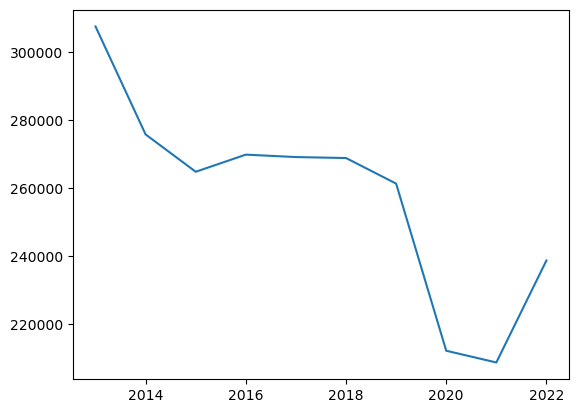

In [43]:
df_count_per_year = df_data.groupby('Year').size().reset_index(name='counts')
df_count_per_year
print(df_count_per_year)
plt.plot(df_count_per_year['Year'], df_count_per_year['counts'])

In [60]:
## top 10 most common crime type in past 10 years
df_count_per_primary_type = df_data.groupby('Primary Type').size().reset_index(name='counts')
df_count_per_primary_type = df_count_per_primary_type.sort_values(by='counts', ascending=False)
df_count_per_primary_type = df_count_per_primary_type.head(10)
print(df_count_per_primary_type)
df_popular_crime_type_list = df_count_per_primary_type['Primary Type'].tolist()

           Primary Type  counts
33                THEFT  581151
2               BATTERY  474132
6       CRIMINAL DAMAGE  279108
1               ASSAULT  190381
9    DECEPTIVE PRACTICE  176095
25        OTHER OFFENSE  162261
18            NARCOTICS  158407
3              BURGLARY  117330
17  MOTOR VEHICLE THEFT  116197
30              ROBBERY   97508


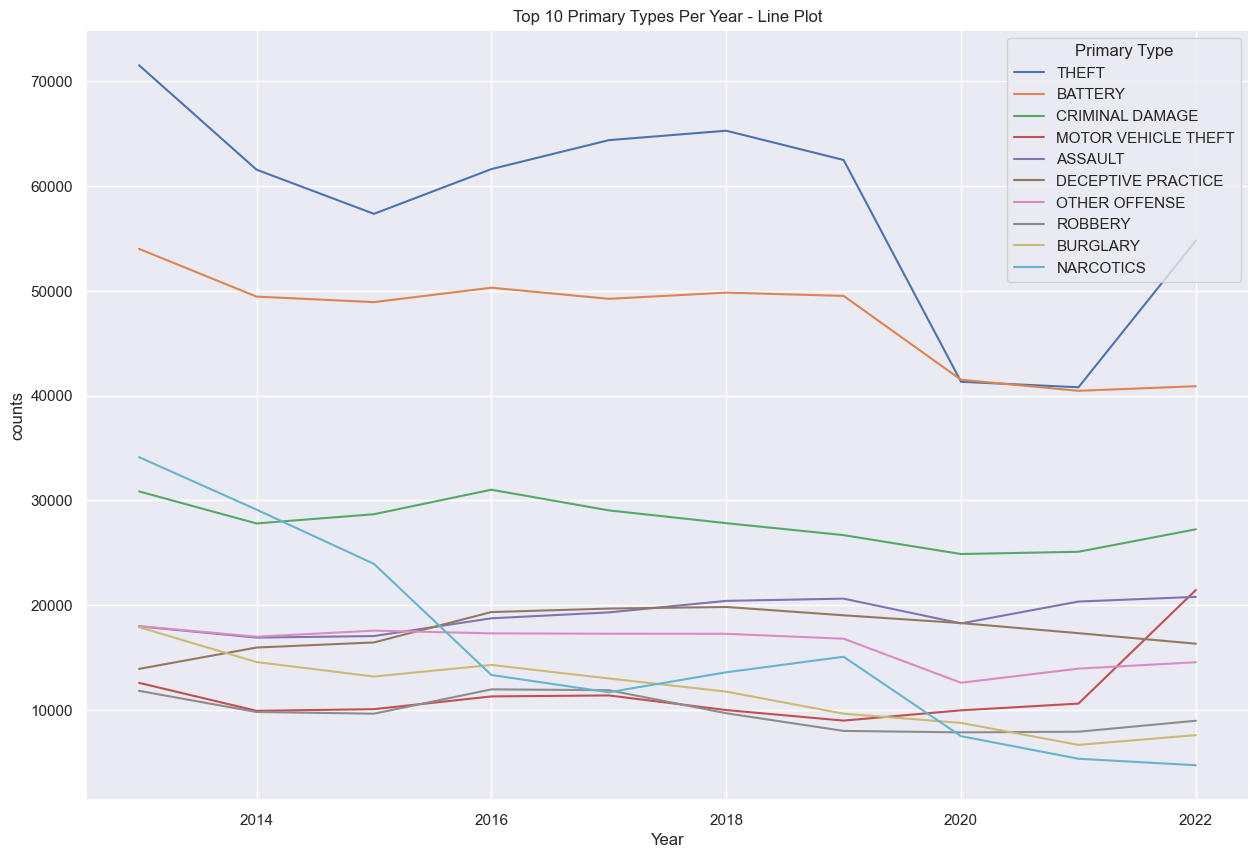

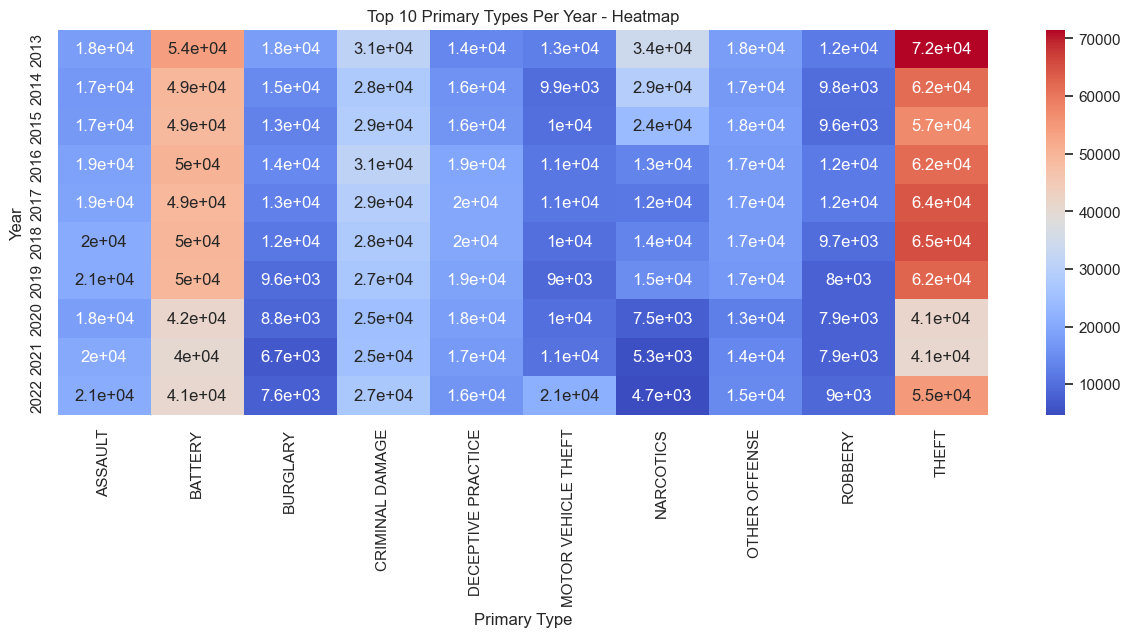

Primary Type,ASSAULT,BATTERY,BURGLARY,CRIMINAL DAMAGE,DECEPTIVE PRACTICE,MOTOR VEHICLE THEFT,NARCOTICS,OTHER OFFENSE,ROBBERY,THEFT
Year,,,,,,,,,,
2013,17972,54006,17895,30855,13914,12582,34127,17999,11820,71534
2014,16903,49452,14569,27798,15952,9911,29118,16985,9800,61568
2015,17048,48923,13184,28676,16439,10068,23939,17566,9638,57350
2016,18742,50299,14289,31018,19338,11286,13333,17307,11960,61621
2017,19306,49239,13001,29045,19672,11380,11683,17269,11880,64383
2018,20406,49828,11746,27824,19825,9985,13590,17263,9680,65286
2019,20620,49518,9638,26681,19029,8977,15072,16794,7994,62491
2020,18254,41512,8757,24878,18286,9959,7492,12590,7855,41320
2021,20342,40458,6659,25094,17322,10601,5337,13940,7917,40794


In [67]:
## TOP 10 PRIMARY TYPES PER YEAR count
df_data_popular_crime_type = df_data[df_data['Primary Type'].isin(df_popular_crime_type_list)]
df_data_popular_crime_type = df_data_popular_crime_type.groupby(['Year', 'Primary Type']).size().reset_index(name='counts')
df_data_popular_crime_type = df_data_popular_crime_type.sort_values(by=['Year', 'counts'], ascending=False)
df_data_popular_crime_type = df_data_popular_crime_type.groupby('Year').head(10)
plt.figure(figsize=(15, 10))
sns.lineplot(data=df_data_popular_crime_type, x='Year', y='counts', hue='Primary Type')
plt.title("Top 10 Primary Types Per Year - Line Plot")
plt.show()

# Heatmap
df_data_popular_crime_type_pivot = df_data_popular_crime_type.pivot(index='Year', columns='Primary Type', values='counts')
plt.figure(figsize=(15, 5))
sns.heatmap(df_data_popular_crime_type_pivot, cmap='coolwarm', annot=True)
plt.title("Top 10 Primary Types Per Year - Heatmap")
plt.show()

df_data_popular_crime_type_pivot

In [23]:
df_location_type = df_data.groupby(['Location Description']).size().reset_index(name='counts')
df_location_type

,Location Description,counts
0,ABANDONED BUILDING,978
1,AIRCRAFT,292
2,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,634
3,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,341
4,AIRPORT EXTERIOR - NON-SECURE AREA,449
...,...,...
185,VESTIBULE,10
186,WAREHOUSE,1239
187,WOODED AREA,2
188,YARD,107
